# Growth

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/julprat/CourseDP_hub/blob/main/Optimal_Growth.ipynb)

## Exercises from the Class Notes

### Exercise 3.1

Assume that (A1)-(A3) hold. Which of the assumptions presented in Lectures 1 and 2 are satisfied?

<details>
<summary><b>Solution</b></summary>

Assumptions A1.1, A1.2, A2.1, A2.3, and A2.4. In assumption A2.2, $F$ is not bounded under (A1)-(A3). However, we can assume that capital is at most equal to the maximum maintainable capital stock.

### Exercise 3.2

Show that, for any $k_0 \in (0,k_{max}]$, the optimal sequence $\{k_t\}_{t=0}^{\infty}$ defined by $k_{t+1}=g(k_t)$ converges monotonically to $k^*=f'^{-1}(1/\beta)$.

<details>
<summary><b>Solution</b></summary>

From fact that $v$ is strictly concave, we have

\begin{equation*}
    \{v^{'}\left(k\right) - v^{'}[g\left(k\right)]\}[k - g\left(k\right)]\leq 0, \forall k\in (0,\overline{k}],
\end{equation*}
 
with equality iff $g\left(k\right) = k$. By the FOC and EC conditions and use the fact that $U^{'}\left(c\right)>0$, we can conclude that

\begin{equation*}
    [f^{'}\left(k\right) - \frac{1}{\beta}][k - g\left(k\right)]\leq 0, \forall k\in (0,\overline{k}], 
\end{equation*}

with equality iff $g\left(k\right) = k$. Since $f$ is concave, it follows that $f^{'}\left(k\right) \stackrel{>}{<} \frac{1}{\beta}$ as $k\stackrel{<}{>} k^{*}$ and $k \stackrel{>}{<} g\left(k\right)$ that as $k \stackrel{>}{<} k^{*}$.

Consider the optimal sequence $\{k_t\}_{t=0}^{\infty}$ defined by $k_{t+1}=g(k_t)$. If $k_{t} \geq k^{*}$, then $k_{t+1} \leq  g\left(k_{t}\right)$, decreasing monotonically until $k = k^{*}$. Likewise, if $k_{t} \leq k^{*}$, then $k_{t+1} \geq  g\left(k_{t}\right)$, increasing monotonically until $k = k^{*}$. Therefore the optimal sequence $\{k_t\}_{t=0}^{\infty}$ converges monotonically to $k^{*}$.

### Exercise 3.3

Write a code in Python that uses an iterative procedure to solve for the value function of the optimal growth model.

**Solution**

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 18 14:37:30 2018
@author: Bruno
"""

#==============================================================================
# Recursive Methods - Optimal Growth
#==============================================================================

import os
import numpy as np
from scipy.optimize import fminbound


def bellman_operator(w, grid, β, u, f, Tw=None, compute_policy=0):
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)

    # == Initialize Tw if necessary == #
    if Tw is None:
        Tw = np.empty_like(w)

    if compute_policy:
        σ = np.empty_like(w)

    # == set Tw[i] = max_c { u(c) + β E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(c, y=y):
            # return #Your code goes here
            return - u(c) - β * w_func(f(y - c))
        c_star = fminbound(objective, 1e-10, y)
        if compute_policy:
            # σ[i] = #Your code goes here #y_(t+1) as a function of y_t
            σ[i] = f(y-c_star) #y_(t+1) as a function of y_t
        # Tw[i] = #Your code goes here
        Tw[i] = - objective(c_star)

    if compute_policy:
        return Tw, σ
    else:
        return Tw



def solve_optgrowth(initial_w, grid, β, u, f, tol=1e-4, max_iter=500):

    w = initial_w  # Set initial condition
    error = tol + 1
    i = 0

    # == Create storage array for bellman_operator. Reduces  memory
    # allocation and speeds code up == #
    Tw = np.empty(len(grid))

    # Iterate to find solution
    while error > tol and i < max_iter:
        w_new = bellman_operator(w,
                                 grid,
                                 β,
                                 u,
                                 f,
                                 Tw)
        # error = #Your code goes here 
        error = np.max(np.abs(w_new - w))
        w[:] = w_new
        i += 1
        print("Iteration "+str(i)+'\n Error is '+str(error)+'\n') if i % 50 == 0 or error < tol else None

        
    # Computes policy
    policy = bellman_operator(w,
                             grid,
                             β,
                             u,
                             f,
                             Tw,
                             compute_policy=1)[1]
 
    return [w, policy]



class CES_OG:
    """
    Constant elasticity of substitution optimal growth model so that

        y = f(k) = k^α


    The class holds parameters and true value and policy functions.
    """

    def __init__(self, α=0.4, β=0.96, sigma=0.9):

        self.α, self.β, self.sigma = α, β, sigma 

    def u(self, c):
        " Utility "
        return (c**(1-self.sigma)-1)/(1-self.sigma)

    def f(self, k):
        " Deterministic part of production function.  "
        return k**self.α



In [3]:
# Creation of the model
ces = CES_OG()
# == Unpack parameters / functions for convenience == #
α, β, sigma = ces.α, ces.β, ces.sigma


### Setup of the grid
grid_max = 1         # Largest grid point
grid_size = 200      # Number of grid points
grid = np.linspace(1e-5, grid_max, grid_size)

# Initial conditions and shocks
initial_w = 5 * np.log(grid)


# Computation of the value function
solve = solve_optgrowth(initial_w, grid, β, u=ces.u,
                               f=ces.f, tol=1e-4, max_iter=500)

value_approx = solve[0]
policy_function = solve[1]


Iteration 50
 Error is 0.13013875164658373

Iteration 100
 Error is 0.01690317836253641

Iteration 150
 Error is 0.002195483316992153

Iteration 200
 Error is 0.000285165329962922

Iteration 226
 Error is 9.86611846087726e-05



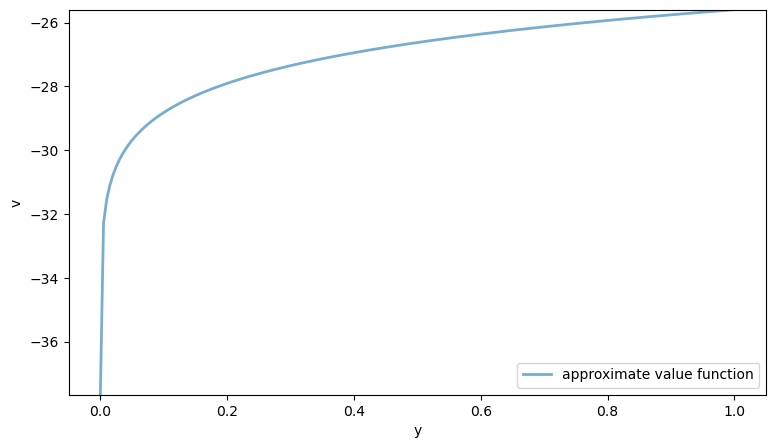

In [4]:

#==============================================================================
# Plotting value function
#==============================================================================
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim(min(value_approx), max(value_approx))
ax.plot(grid, value_approx, lw=2, alpha=0.6, label='approximate value function')
ax.set_xlabel('y')
ax.set_ylabel('v')
ax.legend(loc='lower right')
plt.show()

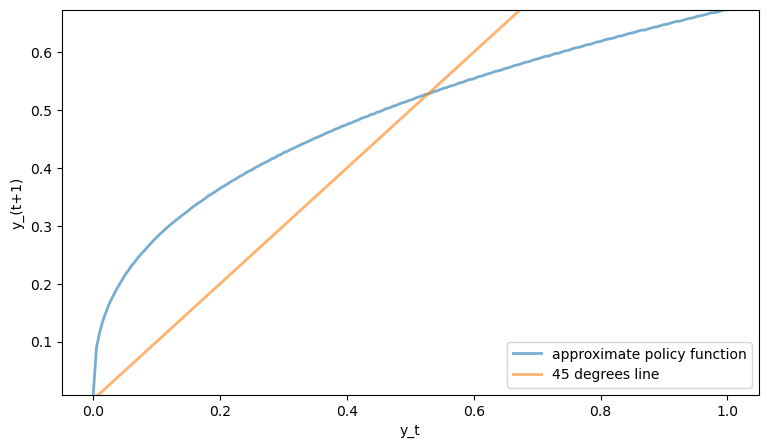

In [5]:
#==============================================================================
# Plotting Policy function
#==============================================================================

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim(min(policy_function), max(policy_function))
ax.plot(grid, policy_function, lw=2, alpha=0.6, label='approximate policy function')

# 45° line
ax.plot(grid, grid, lw=2, alpha=0.6, label='45 degrees line')

ax.set_xlabel('y_t')
ax.set_ylabel('y_(t+1)')
ax.legend(loc='lower right')
plt.show()

## Additional Exercises

### Exercise 3.4 (Sufficiency of Euler and transversality conditions)

Assume that the Assumptions in Lecture 2 are satisfied. 

1. Show that the sequence $\{x^*_{t+1}\}_{t=0}^{\infty}$ with $x^*_{t+1}\in\Gamma(x_t)$ for all $t\geq 0$, is optimal for the Sequential Problem if it satisfies the Euler equation and the following transversality condition: $\lim_{t\rightarrow \infty} \beta^t F_1(x^*_{t},x^*_{t+1})\cdot x^*_{t}=0$.

2. Can we replace the transversality condition in 1 with that of the recursive problem: $\lim_{t\rightarrow \infty} \beta^t V(x^*_{t})=0$?


<details>
<summary><b>Solution</b></summary>

1. It is sufficient to show that the difference between the objective function in the sequential problem evaluated at $\{x^{*}\}$ and at $\{x_{t}\}$ is nonnegative. 

Since $F$ is continuous, concave, and differentiable, 

\begin{align*}
    D &= \lim_{T\rightarrow \infty}\sum_{t = 0}^{T} \beta^{t}[F\left(x^{*}_{t}, x_{t+1}^{*}\right) - F\left(x_{t}, x_{t+1}\right)]\\
      &\geq \lim_{T\rightarrow \infty}\sum_{t = 0}^{T} \beta^{t}[F_{x}\left(x^{*}_{t}, x_{t+1}^{*}\right)\left(x^{*}_{t}-x_{t}\right) + F_{y}\left(x^{*}_{t}, x_{t+1}^{*}\right)\left(x^{*}_{t+1}-x_{t+1}\right)].
\end{align*}

Since $x_{0}^{*} - x_{0} = 0$, rearranging terms givees

\begin{equation*}
    D \geq \lim_{T\rightarrow \infty}\{\sum_{t = 0}^{T-1} \beta^{t}[F_{y}\left(x^{*}_{t}, x_{t+1}^{*}\right) + \beta F_{x}\left(x^{*}_{t+1}, x_{t+2}^{*}\right)]\left(x^{*}_{t+1}-x_{t+1}\right) + \beta^{T} F_{y}\left(x^{*}_{T}, x_{T+1}^{*}\right)\left(x^{*}_{T+1}-x_{T+1}\right)\}.
\end{equation*}

Since $\{x^{*}\}$ satisfies the FOC, the terms in the summation are all zero. Therefore, by the FOC and EC,

\begin{align*}
    D &\geq -\lim_{T\rightarrow \infty}\beta^{T} F_{x}\left(x^{*}_{T}, x_{T+1}^{*}\right)\left(x^{*}_{T}-x_{T}\right)\\
      &\geq -\lim_{T\rightarrow \infty}\beta^{T} F_{x}\left(x^{*}_{T}, x_{T+1}^{*}\right)x^{*}_{T}.
\end{align*}

It then follows that $D\geq 0$, establishing the desired result.

2. Yes, because the value function is concave in this setting.


### Exercise 3.5

1. Let $\bar{k}=f(\bar{k})$ denote the maximum maintainable capital stock. Show that the standard assumptions on $f$ and $U$ ensure that for any $k\in(0,\bar{k}]$, the solution of the Bellman equation is at an interior value for $k'$, so that $v$ is continuously differentiable on $(0,\bar{k}]$, and that the FOC and Envelope Condition (EC) hold for all $k\in(0,\bar{k}]$.

2. Use the EC to show that the policy function $g(k)$ is strictly increasing.

<details>
<summary><b>Solution</b></summary>

1. Pick any $k\in (0,\overline{k}]$. To see that $g\left(k\right) \in \left(0,\overline{k}\right)$, suppose $g\left(k\right) = 0$. Then,

\begin{equation*}
    U^{'}[f\left(k\right)]\geq \beta v^{'}\left(0\right) = \beta U^{'}[f\left(0\right) - g\left(0\right)]f^{'}\left(0\right)
\end{equation*}

but the left-hand side is finite while the right-had side is not. There $k\left(k\right) = 0$ cannot not be optimal.

Suppose then $g\left(k\right) = \overline{k}$. Because $k\in (0,\overline{k}]$, and consumption is nonnegative, it must be that $k = \overline{k}$. Hence,

\begin{equation*}
    U^{'}[f\left(\overline{k}\right)-\overline{k}]\leq \beta v^{'}\left(\overline{k}\right) = \beta U^{'}[f\left(\overline{k}\right) - g\left(\overline{k}\right)]f^{'}\left(\overline{k}\right),
\end{equation*}

but the left-hand side of the inequality stated above is not finite. On the other hand, feasibility requires that $g\left(\overline{k}\right)\leq \overline{k}$. If $g\left(\overline{k}\right)= \overline{k}$, this implies zero consumption even after, which is suboptimal. Hence $g\left(\overline{k}\right)< \overline{k}$. But

\begin{equation*}
    \infty = U^{'}\left(0\right) = U^{'}[f\left(\overline{k}\right) - \overline{k}]\leq \beta U^{'}[f\left(\overline{k}\right) - g\left(\overline{k}\right)]f^{'}\left(\overline{k}\right),
\end{equation*}

and the right-hand side is finite, which is a contradiction. Therefore, the solution of the Bellman equation is an interior value for $k^{'}$. By Theorem 4.11 (Differentiability of the value function), v is contiunously differentiable on $(0,\overline{k}]$.


2. Pick $k,\ k^{'}\in (0,\overline{k}]$, with $k<k^{'}$. Suppose $g\left(k\right)\geq g\left(k^{'}\right)$. Then $v$ being strictly concave implies 

\begin{equation*}
U^{'}[f\left(k\right)-g\left(k\right)] = \beta v^{'}[g\left(k\right)]\leq \beta v^{'}[g\left(k^{'}\right)] = U^{'}[f\left(k^{'}\right)-g\left(k^{'}\right)].
\end{equation*}

Hence, by $U$ being strictly concave,

\begin{equation*}
    f\left(k\right) - g\left(k\right)\geq f\left(k^{'}\right) - g\left(k^{'}\right).
\end{equation*}

Then, $f$ being strictily increasing implies

\begin{equation*}
    g\left(k^{'}\right) - g\left(k\right)\geq f\left(k^{'}\right) - f\left(k^{'}\right)>0,
\end{equation*}

and so $g\left(k^{'}\right)>g\left(k\right)$, which is a contraction.

### Exercise 3.6 

Consider a modification of the canonical growth model where capital goods are produced using only labor. We endow the consumer with one unit labor, and assume that $c_t=n_tf(k_t/n_t) \text{ and } k_{t+1}=1-n_t.$ We also assume that $\lim_{n\rightarrow 0} nf(k,n)=0$ for all $k\in[0,1]$.

1. Write the Bellman equation. Derive the FOC and EC.

2. Find a necessary condition that must be satisfied by the stationary capital stock. Prove that it indeed identifies the steady-state.
3. Let $U(c)=c^{\alpha}$ with $\alpha \in (0,1)$ and $f(x)=x^{\theta}$ with $\theta \in (0,1)$. Use the FOC to show that the policy function $g(k)$ is strictly decreasing on $[0,1]$. 

<details>
<summary><b>Solution</b></summary>

1. The Bellman equation can be written as 

\begin{equation*}
    v\left(k_{t}\right) = \max_{k_{t+1}\in [0,1]} \{U[\left(1-k_{t+1}\right)f\left(\frac{k_{t}}{1-k_{t+1}}\right)] + \beta v\left(k_{t+1}\right)\}.
\end{equation*}

Let $g$ denote the policy funtion. The first-order and envelope conditions are given by

\begin{equation*}
    U^{'}\left([1-g\left(k_{t}\right)]f[\frac{k_{t}}{1-g\left(k_{t}\right)}]\right) \times \{f[\frac{k_{t}}{1-g\left(k_{t}\right)}]-\frac{k_{t}}{1-g\left(k_{t}\right)}f^{'}[\frac{k_{t}}{1-g\left(k_{t}\right)}]\} = \beta v^{'}[g\left(k_{t}\right)]
\end{equation*}

\begin{equation*}
    v^{'}\left(k_{t}\right) = U^{'}\left([1-g\left(k_{t}\right)]f[\frac{k_{t}}{1-g\left(k_{t}\right)}]\right)f^{'}[\frac{k_{t}}{1-g\left(k_{t}\right)}].

\end{equation*}

2. Setting $g\left(k_{t}\right) = k_{t}$ and eliminating $k_{t}^{'}$, a necessary condition for a stationary point is

\begin{equation*}
    f\left(\frac{k_{t}}{1-k_{t}}\right)-\left(\frac{k_{t}}{1-k_{t}} + \beta\right)f^{'}\left(\frac{k_{t}}{1-k_{t}}\right) = 0.
\end{equation*}

By the assumptions on $f$, the equation above has exactly one solution, denoted as $k^{*}$. Since $v$ is strictly concave, the condition in Exercise 3.2 holds. Substituting from the FOC and EC, we have 

\begin{equation*}
\{[\beta + \frac{k_{t}}{1-g\left(k_{t}\right)}]f^{'}[\frac{k_{t}}{1-g\left(k_{t}\right)}] + f[\frac{k_{t}}{1-g\left(k_{t}\right)}]\}[k_{t}-g\left(k_{t}\right)]\leq 0
\end{equation*}

with equality only if $g\left(k_{t}\right) = k_{t}$. Therefore $k^{*}$ is indeed a stationary point.

3. Pick $k,\ k^{'}\in (0,\overline{k}]$, with $k<k^{'}$. Suppose $g\left(k\right)\geq g\left(k^{'}\right)$. With the specific function forms, the FOC is given by

\begin{equation*}
    \alpha [\left(1-g\left(k\right)\right)\left(\frac{k}{1-g\left(k\right)}\right)^{\theta}]^{\alpha-1}[\left(\frac{k}{1-g\left(k\right)}\right)^{\theta} - \frac{\theta k}{1-g\left(k\right)}\left(\frac{k}{1-g\left(k\right)}\right)^{\theta-1}] = \beta v^{'}[g\left(k\right)].
\end{equation*}

As $v$ is strictly concave, we have

\begin{align*}
    & \alpha [\left(1-g\left(k^{'}\right)\right)\left(\frac{k^{'}}{1-g\left(k^{'}\right)}\right)^{\theta}]^{\alpha-1}[\left(\frac{k^{'}}{1-g\left(k^{'}\right)}\right)^{\theta} - \frac{\theta k^{'}}{1-g\left(k^{'}\right)}\left(\frac{k^{'}}{1-g\left(k^{'}\right)}\right)^{\theta-1}]\\
    
    & \leq \alpha [\left(1-g\left(k\right)\right)\left(\frac{k}{1-g\left(k\right)}\right)^{\theta}]^{\alpha-1}[\left(\frac{k}{1-g\left(k\right)}\right)^{\theta} - \frac{\theta k}{1-g\left(k\right)}\left(\frac{k}{1-g\left(k\right)}\right)^{\theta-1}],
\end{align*}

which implies

\begin{equation*}
    1 < \frac{k^{'}}{k}<[\frac{1-g\left(k^{'}\right)}{1-g\left(k\right)}]^{\gamma},
\end{equation*}

where

\begin{equation*}
    \gamma = -[\frac{\left(1-\theta\right)\left(\alpha-1\right)-\theta}{\theta\alpha}]>0.
\end{equation*}

Hence,

\begin{equation*}
    \frac{1-g\left(k^{'}\right)}{1-g\left(k\right)}>1,
\end{equation*}

and so $g\left(k^{'}\right)<g\left(k\right)$, which is a contradiction.

## Phase Diagram

The code below is borrowed from [QuantEcon](https://python.quantecon.org/cass_koopmans_1.html)

It displays the phase diagram of the infinite horizon growth model when

1. Utility function is CRRA: $U(c)=\frac{c^{1-\gamma}}{1-\gamma}$;

2. Production function is Cobb-Douglas with fixed labor supply: $F(K,1)=K^{\alpha}$.

In [1]:
import matplotlib.pyplot as plt
from numba import njit, float64
from numba.experimental import jitclass
import numpy as np
from quantecon.optimize import brentq

We first define a [jitclass](https://numba.pydata.org/numba-doc/dev/user/jitclass.html) that stores parameters and functions that define our economy.

In [6]:
planning_data = [
    ('γ', float64),    # Coefficient of relative risk aversion
    ('β', float64),    # Discount factor
    ('δ', float64),    # Depreciation rate on capital
    ('α', float64),    # Return to capital per capita
    ('A', float64)     # Technology
]

In [7]:
@jitclass(planning_data)
class PlanningProblem():

    def __init__(self, γ=2, β=0.95, δ=0.02, α=0.33, A=1):

        self.γ, self.β = γ, β
        self.δ, self.α, self.A = δ, α, A

    def u(self, c):
        '''
        Utility function
        ASIDE: If you have a utility function that is hard to solve by hand
        you can use automatic or symbolic differentiation
        See https://github.com/HIPS/autograd
        '''
        γ = self.γ

        return c ** (1 - γ) / (1 - γ) if γ!= 1 else np.log(c)

    def u_prime(self, c):
        'Derivative of utility'
        γ = self.γ

        return c ** (-γ)

    def u_prime_inv(self, c):
        'Inverse of derivative of utility'
        γ = self.γ

        return c ** (-1 / γ)

    def f(self, k):
        'Production function'
        α, A = self.α, self.A

        return A * k ** α

    def f_prime(self, k):
        'Derivative of production function'
        α, A = self.α, self.A

        return α * A * k ** (α - 1)

    def f_prime_inv(self, k):
        'Inverse of derivative of production function'
        α, A = self.α, self.A

        return (k / (A * α)) ** (1 / (α - 1))

    def next_k_c(self, k, c):
        ''''
        Given the current capital Kt and an arbitrary feasible
        consumption choice Ct, computes Kt+1 by state transition law
        and optimal Ct+1 by Euler equation.
        '''
        β, δ = self.β, self.δ
        u_prime, u_prime_inv = self.u_prime, self.u_prime_inv
        f, f_prime = self.f, self.f_prime

        k_next = f(k) + (1 - δ) * k - c
        c_next = u_prime_inv(u_prime(c) / (β * (f_prime(k_next) + (1 - δ))))

        return k_next, c_next

In [8]:
# Create economy instance
pp = PlanningProblem()

In [9]:
# Compute stable manifold for Consumption
@njit
def C_tilde(K, pp):

    return pp.f(K) + (1 - pp.δ) * K - pp.f_prime_inv(1 / pp.β - 1 + pp.δ)

# Compute stable manifold for Capital
@njit
def K_diff(K, C, pp):

    return pp.f(K) - pp.δ * K - C

@njit
def K_tilde(C, pp):

    res = brentq(K_diff, 1e-6, 100, args=(C, pp))

    return res.root


In [10]:
# Compute steady-state by combining the two stable manifolds
@njit
def K_tilde_diff(K, pp):

    K_out = K_tilde(C_tilde(K, pp), pp)

    return K - K_out

res = brentq(K_tilde_diff, 8, 10, args=(pp,))

Ks = res.root
Cs = C_tilde(Ks, pp)

Ks, Cs

(9.575838163314447, 1.9160839808123402)

In [11]:
# Implements the shooting algorithm for the planning problem.
@njit
def shooting(pp, c0, k0, T=10):
    '''
    Given the initial condition of capital k0 and an initial guess
    of consumption c0, computes the whole paths of c and k
    using the state transition law and Euler equation for T periods.
    '''
    if c0 > pp.f(k0) + (1 - pp.δ) * k0:
        print("initial consumption is not feasible")

        return None

    # initialize vectors of c and k
    c_vec = np.empty(T+1)
    k_vec = np.empty(T+2)

    c_vec[0] = c0
    k_vec[0] = k0

    for t in range(T):
        k_vec[t+1], c_vec[t+1] = pp.next_k_c(k_vec[t], c_vec[t])

    k_vec[T+1] = pp.f(k_vec[T]) + (1 - pp.δ) * k_vec[T] - c_vec[T]

    return c_vec, k_vec

In [12]:
# Use a bisection method to match the terminal condition
@njit
def bisection(pp, c0, k0, T=10, tol=1e-4, max_iter=500, k_ter=0, verbose=True):

    # initial boundaries for guess c0
    c0_upper = pp.f(k0)
    c0_lower = 0

    i = 0
    while True:
        c_vec, k_vec = shooting(pp, c0, k0, T)
        error = k_vec[-1] - k_ter

        # check if the terminal condition is satisfied
        if np.abs(error) < tol:
            if verbose:
                print('Converged successfully on iteration ', i+1)
            return c_vec, k_vec

        i += 1
        if i == max_iter:
            if verbose:
                print('Convergence failed.')
            return c_vec, k_vec

        # if iteration continues, updates boundaries and guess of c0
        if error > 0:
            c0_lower = c0
        else:
            c0_upper = c0

        c0 = (c0_lower + c0_upper) / 2

We now compute two trajectories towards the steady-state that start from different sides of K_{S}. 

In [13]:
c_vec1, k_vec1 = bisection(pp, 5, 15, T=200, k_ter=Ks)
c_vec2, k_vec2 = bisection(pp, 1e-3, 1e-3, T=200, k_ter=Ks)

Converged successfully on iteration  46
Converged successfully on iteration  52


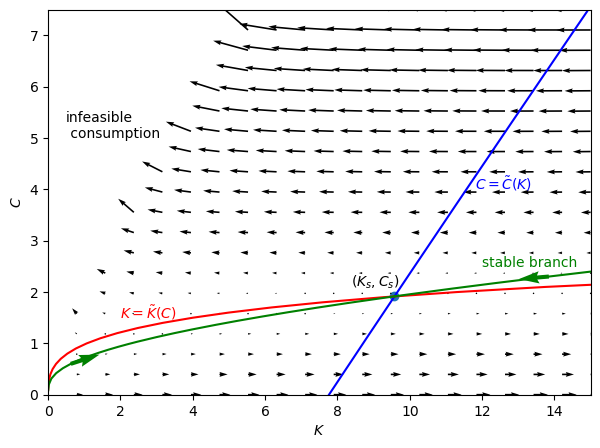

In [14]:
# Plot Phase Diagram
fig, ax = plt.subplots(figsize=(7, 5))

K_range = np.arange(1e-1, 15, 0.1)
C_range = np.arange(1e-1, 2.3, 0.1)

# C tilde
ax.plot(K_range, [C_tilde(Ks, pp) for Ks in K_range], color='b')
ax.text(11.8, 4, r'$C=\tilde{C}(K)$', color='b')

# K tilde
ax.plot([K_tilde(Cs, pp) for Cs in C_range], C_range, color='r')
ax.text(2, 1.5, r'$K=\tilde{K}(C)$', color='r')

# stable branch
ax.plot(k_vec1[:-1], c_vec1, color='g')
ax.plot(k_vec2[:-1], c_vec2, color='g')
ax.quiver(k_vec1[5], c_vec1[5],
          k_vec1[6]-k_vec1[5], c_vec1[6]-c_vec1[5],
          color='g')
ax.quiver(k_vec2[5], c_vec2[5],
          k_vec2[6]-k_vec2[5], c_vec2[6]-c_vec2[5],
          color='g')
ax.text(12, 2.5, r'stable branch', color='g')

# (Ks, Cs)
ax.scatter(Ks, Cs)
ax.text(Ks-1.2, Cs+0.2, '$(K_s, C_s)$')

# arrows
K_range = np.linspace(1e-3, 15, 20)
C_range = np.linspace(1e-3, 7.5, 20)
K_mesh, C_mesh = np.meshgrid(K_range, C_range)

next_K, next_C = pp.next_k_c(K_mesh, C_mesh)
ax.quiver(K_range, C_range, next_K-K_mesh, next_C-C_mesh)

# infeasible consumption area
ax.text(0.5, 5, "infeasible\n consumption")

ax.set_ylim([0, 7.5])
ax.set_xlim([0, 15])

ax.set_xlabel('$K$')
ax.set_ylabel('$C$')

plt.show()